# Řešení nelineárních rovnic

Naimportujeme si knihovny potřebné pro následující příklady:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

- numerické řešení nelineární rovnice je vždy **iterační**
- řešení nejdříve **odhadneme**, pak ho postupně **zpřesňujeme**

## Řešení jedné nelineární rovnice

- řešíme $f(x)=0$ (řešení se často nazývá kořen)
- postup:
    1. ohraničení kořenů - určení intervalů, které obsahují jeden kořen
    - pokud pro $x_{1}<x_{2}$ platí, že $f(x_{1})f(x_{2})<0$, pak je v intervalu $(x_{1},x_{2})$ alespoň jeden kořen
    2. zpřesňování hodnoty kořene


### Metoda půlení intervalu
- postup
    1. nechť je kořen ohraničen $\langle a_{0},b_{0}\rangle$ tak, že platí $f(a_{0})f(b_{0})<0$
    2. vypočítáme $x_{1}=(a_{0}+b_{0})/2$
    3. jeden krajní bod ponecháme, druhý posuneme do $x_{1}$, aby opět platilo $f(a_{1})f(b_{1})<0$
- po $n$-tém kroku je kořen omezený body $a_{n}$ a $b_{n}$
- nepřesnost určení kořene: $\epsilon = \lvert b_{n}-a_{n}\rvert$, přičemž $\epsilon_{n+1}=\epsilon_{n}/2$
- spolehlivá metoda
- v blízkosti kořene pomalá

<div class="alert alert-block alert-warning"><b>Cvičení 07.01: </b> Najděte kořen rovnice $f(x)=\sin(x)-0.5$ metodou půlení intervalu.</div>

In [2]:
#
# metoda puleni intervalu

# demonstrace metody puleni intervalu pro nelinearni rovnice

# nadefinujeme f(x) a budeme hledat reseni f(x)=0
def f(x):
    return np.sin(x)-0.5

iteraci = 50 # celkovy pocet iteraci

# pocatecni body omezujici reseni
a = 0 
b = 1

# budeme si prubezne ukladat odhad reseni a chybu odhadu
epsilon = np.zeros((iteraci)) # odhad chyby, tedy delku intervalu <a,b> v jednotlivych krocich
reseni = np.zeros((iteraci)) # aktualni odhad reseni

for i in range(iteraci):
    # DOPLNTE
    #
    # DOPLNTE


koren = reseni[-1] # odhad konecneho reseni
chyba = epsilon[-1] # odhad konecne chyby


fig, ax = plt.subplots(1,2,figsize=(15,5))

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci),reseni,label='reseni')
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci),epsilon,label='vyvoj chyby')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
ax[1].legend()

# overeni reseni
spravne_reseni = fsolve(f, a)
print('f(x)=0 pro x= ',spravne_reseni)

IndentationError: expected an indented block after 'for' statement on line 20 (4089753052.py, line 26)

### Metoda sečny
- postup
    1. mějme body $a_{n-1}$ a $a_{n}$
    2. zvolíme $a_{n+1}$ v průsečíku spojnice bodů $\left(a_{n-1},y(a_{n-1})\right)$ a $\left(a_{n},y(a_{n})\right)$ s osou $x$
- konvergence **není** zaručena

<div class="alert alert-block alert-warning"><b>Cvičení 07.02: </b> Najděte kořen rovnice $f(x)=\exp(x)-6$ metodou sečny.</div>

f(x)=0 pro x=  [1.79175947]


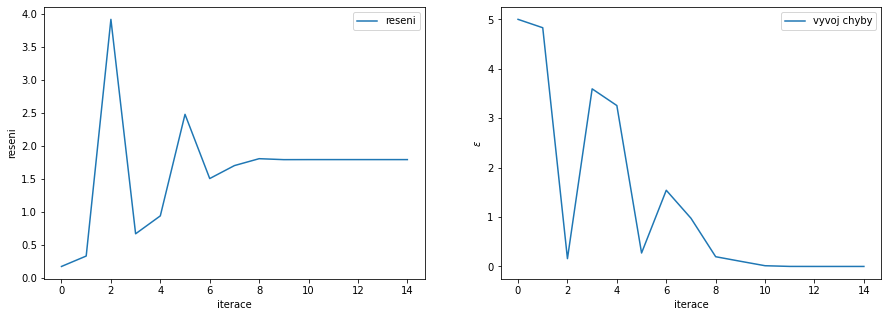

In [22]:
#
# metoda secen

#demonstrace metody secen pro nelinearni rovnice
#spolu s odhadem radu metody

#nadefinujeme f(x) a budeme hledat reseni f(x)=0
def f(x):
    return np.exp(x) - 6


iteraci = 15 # celkovy pocet iteraci


xi = 0 # pocatecni body omezujici reseni x(i)
xi_p1 = 5 # a x(i+1)

# budeme si prubezne ukladat odhad reseni a chybu odhadu
epsilon = np.zeros((iteraci)) # odhad chyby, tedy rozdil poslednich dvou odhadu korene
reseni = np.zeros((iteraci)) # aktualni odhad reseni

for i in range(iteraci):
    c = (xi*f(xi_p1)-f(xi)*xi_p1)/(f(xi_p1)-f(xi))
    epsilon[i] = np.abs(xi-xi_p1)
    xi = xi_p1
    xi_p1 = c
    reseni[i] = c


koren = reseni[-1] # odhad konecneho reseni
chyba = epsilon[-1] # odhad konecne chyby

fig, ax = plt.subplots(1,2,figsize=(15,5))

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci),reseni,label='reseni')
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci),epsilon,label='vyvoj chyby')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
ax[1].legend()

# overeni reseni
spravne_reseni = fsolve(f, a)
print('f(x)=0 pro x= ',spravne_reseni)

### Metoda regula falsi
- modifikace metody sečen
- po určení $a_{n+1}$ si k němu vyberu z $a_{n-1}$ a $a_{n}$ takový bod $\tilde{a}_{n}$, aby kořen zůstal ohraničený, tj. $f(\tilde{a}_{n})f(a_{n+1})<0$
- konvergence **je** zaručena

### Newton–Raphsonova (tečnová) metoda
- využívá první derivaci zadané funkce (je vhodná, pokud umíme hodnoty derivací rychle počítat)
- Taylorův rozvoj zadané funkce v okolí bodu $x_{i}$:
$$
f(x_{i}+\delta)=f(x_{i})+\delta f'(x_{i})+\dfrac{\delta^{2}}{2}f''(x_{i})+\dots
$$
- vypočítáme $\delta$ z podmínky $f(x)=0$
- iterační vzorec: $x_{i+1}=x_{i}-\dfrac{f(x_{i})}{f'(x_{i})}$ 
- konvergence není zaručena

<div class="alert alert-block alert-warning"><b>Cvičení 07.03: </b> Najděte kořen rovnice $f(x)=\exp(x)-6$ tečnovou metodou.</div>

f(x)=0 pro x=  [1.79175947]


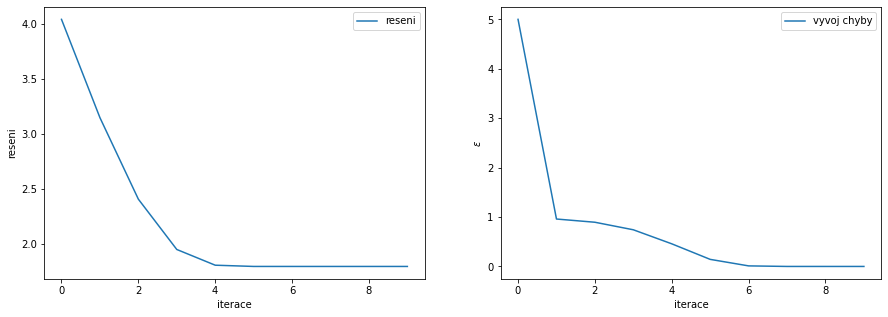

In [24]:
# metoda tecny


#demonstrace metody tecen pro nelinearni rovnice
#spolu s odhadem radu metody

# nadefinujeme f(x) a budeme hledat reseni f(x)=0
def f(x):
    return np.exp(x) - 6

# derivace
def df(x):
    return np.exp(x)

iteraci=10 # celkovy pocet iteraci

xi = 0 # pocatecni body omezujici reseni x(i)
xi_p1 = 5 # a x(i+1)

# budeme si prubezne ukladat odhad reseni a chybu odhadu
epsilon = np.zeros((iteraci)) # odhad chyby, tedy rozdil poslednich dvou odhadu korene
reseni = np.zeros((iteraci)) # aktualni odhad reseni

for i in range(iteraci):
    # DOPLNTE
    #
    # DOPLNTE
    
koren = reseni[-1] # odhad konecneho reseni
chyba = epsilon[-1] # odhad konecne chyby

fig, ax = plt.subplots(1,2,figsize=(15,5))

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci),reseni,label='reseni')
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci),epsilon,label='vyvoj chyby')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
ax[1].legend()

# overeni reseni
spravne_reseni = fsolve(f, a)
print('f(x)=0 pro x= ',spravne_reseni)


### Mullerova metoda
- [teorie](http://kfe.fjfi.cvut.cz/~vachal/edu/nme/cviceni/05_nelin/DOCS/teorie_Mullerova_metoda.pdf)

<div class="alert alert-block alert-warning"><b>Cvičení 07.04: </b> Najděte kořen rovnice $f(x)=4x^{3}-2x^{2}-4x-3$ Mullerovou metodou.</div>

In [6]:
# Mullerova metoda

def f(x):
    return  4*x**3 - 2*x**2 - 4*x - 3

# pozadovana presnost
presnost = 1.0e-6

n = 1

# známe 3 body a odpovídající 3 funkční hodnoty
x1 = 1
x2 = 2
x3 = 1.1
y1 = f(x1)
y2 = f(x2)
y3 = f(x3)

while (np.abs(y3) > presnost): # predpokladame, ze treti bod je neblize reseni
    #print('Krok ', n ,', koren ', x3 ,', hodnota ', y3)
    # hodnoty y1, y2, y3 prolozime Lagrangeovym polynomem, coz lze zapsat jako L(x)=A*x^2 + B*x + C
    a1 = y1/((x1-x2)*(x1-x3))
    a2 = y2/((x2-x1)*(x2-x3))
    a3 = y3/((x3-x1)*(x3-x2))
    A = a1+a2+a3
    C = x2*x3*a1 + x1*x3*a2 + x1*x2*a3
    B = -(x2+x3)*a1 -(x1+x3)*a2 -(x1+x2)*a3

    # hledame reseni L(x) = 0
    xn = (-B+np.sqrt(B*B-4*A*C))/(2*A)
    xn0 = (-B-np.sqrt(B*B-4*A*C))/(2*A)

    # z korenu vybereme ten, ktery je blizsi k x3
    if np.abs(xn0-x3)<np.abs(xn-x3):
        xn = xn0
    
    # iteracni predpis
    x1 = x2
    x2 = x3
    x3 = xn
    y1 = y2
    y2 = y3
    y3 = f(xn)

    n = n+1
    


# Soustavy nelineárních rovnic

- řešíme soustavu $\vec{f}(\vec{x})=\vec{0}$
- přepíšeme ji do tvaru:

$$
f_{1}(x_{1},x_{2},\dots,x_{n})=0,
$$
$$
f_{2}(x_{1},x_{2},\dots,x_{n})=0,
$$
$$
f_{3}(x_{1},x_{2},\dots,x_{n})=0,
$$
$$
\vdots
$$
$$
f_{n}(x_{1},x_{2},\dots,x_{n})=0.
$$

## Prostá iterace

- soustavu lze přepsat do tvaru $\vec{x}=\vec{\varphi}(\vec{x})$:

$$
x_{1}=\varphi_{1}(\vec{x}),
$$


$$
x_{2}=\varphi_{2}(\vec{x}),
$$

$$
x_{3}=\varphi_{3}(\vec{x}),
$$

$$
\vdots
$$

$$
x_{n}=\varphi_{n}(\vec{x}).
$$

- soustava má **stejné** řešení jako původní soustava nelineárních rovnic
- iterační vzorec: $\vec{x}^{(k+1)}=\vec{\varphi}(\vec{x}^{k})$

<div class="alert alert-block alert-warning"><b>Cvičení 07.05: </b> Pomocí iterační metody najděte řešení soustavy nelineárních rovnic $$x^{2}+4x-y^{2}-2y-1=0,$$ $$x^{2}+5y-4=0.$$</div>

In [6]:
#
# reseni soustavy nelinearnich rovnic metodou proste iterace

# puvodni rovnice f1, f2
def f1(x,y):# f1(x,y) = 0
    return x**2 + 4*x - y**2 - 2*y -1

def f2(x,y): # f2(x,y) = 0
    return x**2 + 5*y -4

# parametricke vyjadreni x,y
def phi1(x,y): # x = phi1(x,y)
    return (y**2 + 2*y +1 -x**2)/4

def phi2(x,y): # y = phi2(x,y)
    return (4-x**2)/5

n  = 20 # pocet kroku
x0 = 0  # pocatecni odhad x
y0 = 0  # pocatecni odhad y

for i in range(n):
    #zobrazeni aktualni velikosti x,y a hodnot f1, f2 v danych bodech
    #print('Krok ', i ,', (x0, y0)=(', x0 ,',', y0 ,')')
    #print('Krok ', i ,', f1(x0, y0)= ', f1(x0,y0))
    #print('Krok ', i ,', f2(x0, y0)= ', f2(x0,y0))
    #iteracni krok - vypocet z parametrickych rovnic
    
    # DOPLNTE
    #
    # DOPLNTE


## Newton–Raphsonova metoda

- přesné řešení $\vec{\xi}$ vyjádříme ve tvaru $\vec{\xi}=\vec{x}+\delta\vec{x}$
- hodnotu funkce v bodě $\vec{\xi}$ vyjádříme pomocí Taylorovy věty:
$$
f_{i}(\vec{x}+\delta\vec{x})=f_{i}(\vec{x})+\sum_{j=1}^{n}\dfrac{\partial f_{i}}{\partial x_{j}}\delta x_{j}+\mathcal{O}(\delta \vec{x}^{2})
$$
- zanedbáním $\mathcal{O}(\delta \vec{x}^{2})$ získáme:
$$
f_{i}(\vec{x}+\delta\vec{x})=f_{i}(\vec{x})+\sum_{j=1}^{n}\dfrac{\partial f_{i}}{\partial x_{j}}\delta x_{j}=0
$$
- řešíme tedy soustavu $n$ lineárních rovnic s neznámou $\delta \vec{x}$
- iterační vztah: $ x_{i}^{(k+1)}=x_{i}^{(k)}+ \delta x_{i}^{(k)}$

<div class="alert alert-block alert-warning"><b>Cvičení 07.06: </b> Pomocí Newton-Raphsonovy metody najděte řešení soustavy nelineárních rovnic $$x^{2}+4x-y^{2}-2y-1=0,$$ $$x^{2}+5y-4=0.$$</div>

In [4]:
#
# reseni soustavy nelinearnich rovnic Newton-Raphsonovou metodou

stupen = 2

# delka kroku
h = 0.01

# derivace funkce f podle x metodou centralni diference
def dfdx(f,x,y,h):
    return 1/(2*h) * ( f(x+h,y) - f(x-h,y) )

# derivace funkce f podle y metodou centralni diference
def dfdy(f,x,y,h):
    return 1/(2*h) * ( f(x,y+h) - f(x,y-h) )

# puvodni rovnice f1, f2
def f1(x,y):# f1(x,y) = 0
    return x**2 + 4*x - y**2 - 2*y - 1

def f2(x,y):# f2(x,y) = 0
    return x**2 + 5*y - 4

# pocet iteraci
n = 20

# pocatecni odhad
x0 = 1
y0 = 1

# matice A a prava strana b pro soustavu linearnich rovnic
A = np.zeros((stupen,stupen))
b = np.array((stupen,1), dtype='float')

for i in range(n):
    print('Krok ', i ,', (x0, y0)=(', x0 ,',', y0 ,')')
    print('Krok ', i ,', f1(x0, y0)= ', f1(x0,y0))
    print('Krok ', i ,', f2(x0, y0)= ', f2(x0,y0))
    
    # DOPLNTE
    # A[0,0] = 
    # ...
    # b[0] = 
    # b[1] =
    # DOPLNTE

    # vypocitame neznamou
    dx = np.linalg.solve(A,b)

    # iteracni vztah
    x0 = x0 + dx[0]
    y0 = y0 + dx[1]

    print('Krok ', i ,', dx= ', dx)
    print('A=', A)
    print('b= ', b)

